# Workspace \#8: ``data.py``

In [18]:
# getting future division
from __future__ import division

# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
#%matplotlib inline
%matplotlib notebook

%config InlineBackend.figure_format = "retina"
rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

# current directory
current_dir = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from random import random

import sys
sys.path.insert(0, '../')

import tools as tl
import constants as ct
import particle as pt
import ska as sk
import astro as ap
import echo as ec
import routines as rt
import data as dt

/home/chen/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [20]:
# The contents of data.py
dir(dt)

['LR',
 'R',
 'Simbad',
 'SkyCoord',
 'SuperNova',
 'SuperNovaRemnant',
 'TR_arr',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'age_from_radius',
 'ap',
 'clean_white_spaces',
 'ct',
 'curve_fit',
 'data_path',
 'datetime',
 'division',
 'exp',
 'found_age',
 'gen_SN_with_table2',
 'lin_reg_pred',
 'load_Bietenholz',
 'load_Green_catalogue',
 'load_Green_catalogue_names',
 'load_table2',
 'log',
 'log10',
 'lumin',
 'name',
 'name_expand',
 'new_name',
 'np',
 'os',
 'pd',
 'pheno_age',
 'physics_age',
 'pi',
 'power',
 're',
 'reg_lin',
 'reg_log',
 'simbad_to_galactic',
 'snr',
 'snr_ages',
 'snr_cat',
 'snr_name_arr',
 'snrs_age',
 'snrs_age_only',
 'snrs_cut',
 'snrs_dct',
 'sorted_age_idx',
 'sqrt',
 'test2',
 'update_Bietenholz_with_coord',
 'update_Bietenholz_with_table2']

In [21]:
print(len(dt.snrs_dct))
print(len(dt.snrs_cut))
print(len(dt.snrs_age))
print(len(dt.snrs_age_only))
print(len(dt.snr_ages))

294
72
60
128
134


In [5]:
dt.snrs_cut.keys()

dict_keys(['G4.5+6.8', 'G5.4-1.2', 'G11.0-0.0', 'G11.2-0.3', 'G15.4+0.1', 'G18.1-0.1', 'G18.6-0.2', 'G18.8+0.3', 'G18.9-1.1', 'G20.0-0.2', 'G21.8-0.6', 'G22.7-0.2', 'G23.3-0.3', 'G24.7-0.6', 'G27.4+0.0', 'G29.7-0.3', 'G32.8-0.1', 'G33.6+0.1', 'G34.7-0.4', 'G35.6-0.4', 'G39.2-0.3', 'G39.7-2.0', 'G41.1-0.3', 'G43.3-0.2', 'G46.8-0.3', 'G49.2-0.7', 'G53.6-2.2', 'G54.1+0.3', 'G54.4-0.3', 'G57.2+0.8', 'G65.3+5.7', 'G67.7+1.8', 'G78.2+2.1', 'G82.2+5.3', 'G89.0+4.7', 'G93.3+6.9', 'G93.7-0.2', 'G94.0+1.0', 'G108.2-0.6', 'G109.1-1.0', 'G111.7-2.1', 'G113.0+0.2', 'G114.3+0.3', 'G116.5+1.1', 'G116.9+0.2', 'G119.5+10.2', 'G120.1+1.4', 'G127.1+0.5', 'G156.2+5.7', 'G166.0+4.3', 'G189.1+3.0', 'G205.5+0.5', 'G260.4-3.4', 'G290.1-0.8', 'G292.0+1.8', 'G292.2-0.5', 'G296.8-0.3', 'G304.6+0.1', 'G315.4-2.3', 'G316.3-0.0', 'G320.4-1.2', 'G327.4+0.4', 'G327.6+14.6', 'G328.4+0.2', 'G330.2+1.0', 'G332.4-0.4', 'G337.2-0.7', 'G344.7-0.1', 'G348.5+0.1', 'G349.7+0.2', 'G350.1-0.3', 'G352.7-0.1'])

In [9]:
# Common names of SNR and their Green's Catalog code:
CasA = 'G111.7-2.1'
W28 = 'G6.4-0.1'
W50 = 'G39.7-2.0'
Kepler = 'G4.5+6.8'
Crab = 'G184.6−5.8'
Vela = 'G263.9−3.3'
SgrAEast = 'G0.0+0.0'

In [91]:
dt.snr_ages.loc[dt.name_expand(W50)]

age_min (yr)     30000.000000
age_max (yr)    100000.000000
geom_mean        54772.255751
arith_mean       65000.000000
Name: G039.7-02.0, dtype: float64

In [10]:
# Cassiopeia A
dt.snrs_cut[CasA].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': True,
 'is_flux_certain': True,
 'is_type_certain': True,
 'name': 'G111.7-2.1',
 'l': 111.7,
 'b': -2.1,
 'age': 321.0,
 'ang_size': 5.0,
 'sr': 1.6614302187698022e-06,
 'type': 'S',
 'snu_at_1GHz': 2300.0,
 'alpha': 0.77,
 'distance': 3.3,
 'radius': 2.3998277214922035}

In [11]:
# W50
dt.snrs_cut[W50].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': False,
 'is_flux_certain': False,
 'is_type_certain': False,
 'name': 'G39.7-2.0',
 'l': 39.7,
 'b': -2.0,
 'ang_size': 84.8528137423857,
 'sr': 0.0004784858509023251,
 'snu_at_1GHz': 85.0,
 'alpha': 0.7,
 'distance': 4.9,
 'age': 54772.25575051661,
 'radius': 60.47257332493333}

In [12]:
# W28
dt.snrs_dct[W28].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': False,
 'is_flux_certain': True,
 'is_type_certain': True,
 'name': 'G6.4-0.1',
 'l': 6.4,
 'b': -0.1,
 'ang_size': 48.0,
 'sr': 0.00015311679381005744,
 'type': 'C',
 'snu_at_1GHz': 310.0,
 'distance': 1.9,
 'age': 34467.37587922817,
 'radius': 13.264502315156903}

## 1. Data Exploration

### 1.1 SN data (Bietenholz)

Warning: 

it seems that Bietenholz only published 108 new SNe in machine readable format. The rest is just collected from old measurements. Perhaps it is easier to just use their $t_{peak}$ $L_{peak}$ fit rather than re-inventing the wheel. Large portion of this section will not to be used. Stop now and proceed with fitted $L_{peak}$ $t_{peak}$ as Manuel did

Loading Bietenholz's Table 1:

In [13]:
# Bietenholz Table 1
table1_path = '../data/Table1_complete_ascii.txt'
SNe = dt.load_Bietenholz(table1_path)

print('%s' %(list(SNe.keys())[1:10]))
print(len(SNe.keys())) # SN1008in seems a typo: ought to be SN2008in; see, v.g., arXiv:1306.5122

['SN1982F', 'SN1985F', 'SN1985G', 'SN1985H', 'SN1987F', 'SN1987K', 'SN1988Z', 'SN1989L', 'SN1990K']
108


In [14]:
print([key for key in SNe.keys() if '008' in key])

['SN2008X', 'SN2008ax', 'SN2008bo', 'SN1008in', 'SN2008jb']


Loading Bietenholz's Table 2:

In [15]:
# Bietenholz Table 2
table2_path = '../data/Table2_extended_SN_info.txt'
table2 = dt.load_table2(table2_path)
# table2['SN1979C']

dt.update_Bietenholz_with_table2(SNe, table2)
print(len(table2.keys()))

SN1988S failed updating
SN1008in failed updating
294


In [16]:
list(SNe.items())[2][1].__dict__

{'name': 'SN1985F',
 'is_limit': array([ True,  True]),
 'year': array([1985., 1985.]),
 'month': array([3., 7.]),
 'day': array([18., 31.]),
 't': array([], dtype=float64),
 'telescope': array(['VLA    ', 'VLA    '], dtype='<U32'),
 'freq': array([4.86, 4.86]),
 'flux': array([-0.189, -0.33 ]),
 'dflux': array([0.064, 0.11 ]),
 'comment': array(['', ''], dtype='<U32'),
 'type': 'Ib/c',
 'galaxy': 'NGC 4618',
 'dist': None,
 'explosion_date': '1984 03 30',
 'number_of_measurements': None,
 'detected': None,
 'has_explosion_time': False,
 'distance': 7.2}

In [17]:
freqs = []
for name, data in SNe.items():
    sn_dict = data.__dict__
    
    try:
        freq = sn_dict['freq']
        freqs.append(freq)
    except:
        continue

factors = [(1./nu)**-0.8 for nu in freqs]

In [18]:
avg_freqs = np.array([f_arr.mean() for f_arr in freqs])
# avg_freqs = np.array([np.median(f_arr) for f_arr in freqs])

print(len(avg_freqs), avg_freqs.mean(), avg_freqs.std())

108 7.99524358974359 2.5289175433962154


In [19]:
avg_factors = np.array([ft_arr.mean() for ft_arr in factors])
print(len(avg_factors), avg_factors.mean(), avg_factors.std())
print(avg_factors.std()/avg_factors.mean())

108 5.226613554986191 1.2050365767568736
0.23055781034495432


Finding the coordinates:

In [20]:
# query the coord of the galaxies from Simbad
dt.update_Bietenholz_with_coord(SNe, use_Simbad=True)

# reuse local cache from query of Simbad
dt.update_Bietenholz_with_coord(SNe, use_Simbad=False)

/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 94 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : SN 1008in
  (error.line, error.msg))


SN2004am failed the query
SN2004am failed the query


In [21]:
# example:
# SNe['SN2010as'].__dict__
SNe['SN1008in'].__dict__ # note the year of SN1008in

{'name': 'SN1008in',
 'is_limit': array([ True]),
 'year': array([2008.]),
 'month': array([12.]),
 'day': array([31.36]),
 't': array([], dtype=float64),
 'telescope': array(['VLA    '], dtype='<U32'),
 'freq': array([8.46]),
 'flux': array([-0.227]),
 'dflux': array([0.076]),
 'comment': array([''], dtype='<U32'),
 'type': None,
 'galaxy': None,
 'dist': None,
 'explosion_date': None,
 'number_of_measurements': None,
 'detected': None,
 'has_explosion_time': False}

Plotting lightcurves:

In [22]:
import numpy.ma as ma

In [23]:
for name, SN in SNe.items():
    SN.gen_time_axis()

/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/numpy/ma/core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


None
None


106

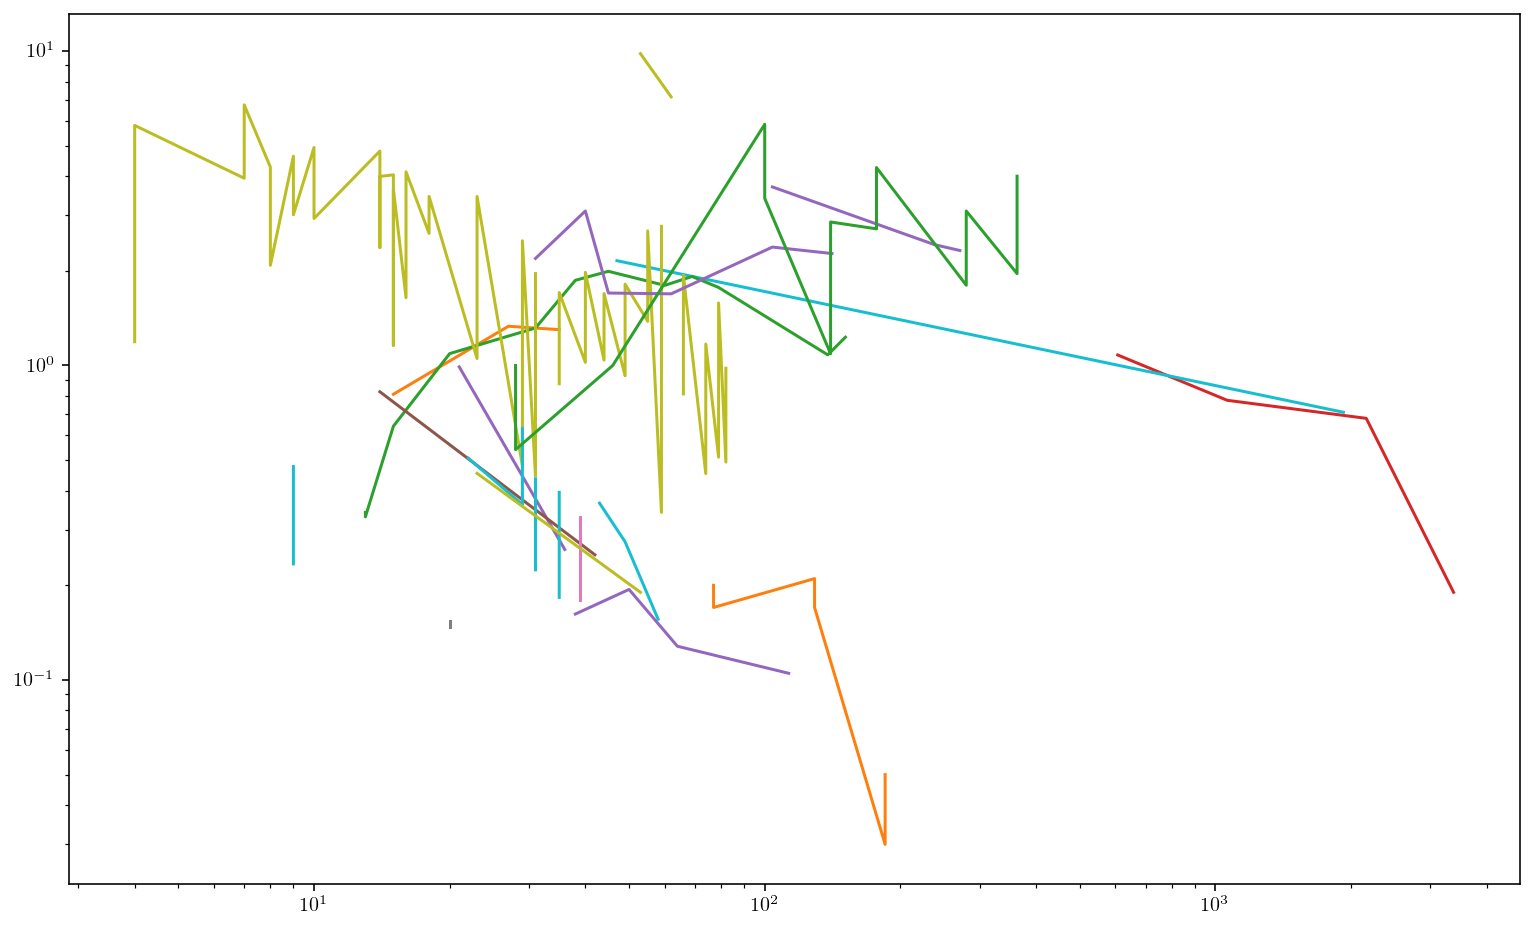

In [24]:
plt.subplots()
n = 0

for name, SN in SNe.items():
    if not SN.has_explosion_time:
        print(SN.explosion_date)
        continue
    n += 1
    mask = SN.is_limit
    t = ma.masked_array(SN.t, mask=mask)
    flux = ma.masked_array(SN.flux, mask=mask)
    plt.loglog(t, flux)
    #plt.loglog((SN.t), (SN.flux))
    #plt.loglog(np.abs(SN.t), np.abs(SN.flux))
n

### 1.2 Green's Catalogue

In [25]:
# first let's parse snrs.list.html
# names:
path = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/snrs.list.html'
snr_name_arr = dt.load_Green_catalogue_names(path=path)

# catalogue:
pathroot = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/'
snrs_dct = dt.load_Green_catalogue(snr_name_arr, pathroot=pathroot, verbose=0)

In [26]:
name = 'G8.9+0.4'

print(snrs_dct[name].get_spectral_index())
print(snrs_dct[name].is_spectral_certain)
print(snrs_dct[name].get_type())
print(snrs_dct[name].is_type_certain)

del name

0.6
True
S
True


In [27]:
# luminosity v. diameter
path = '../data/Green_2005_lum_diam.csv'
green2005_lum_diam_arr = np.loadtxt(path, delimiter=',')

# surface brightness v. diameter
path = '../data/Green_2005_SB_diam.csv'
green2005_SB_diam_arr = np.loadtxt(path, delimiter=',')

In [28]:
# length of catalogues
print(len(snrs_dct))
print(len(green2005_lum_diam_arr))
print(len(green2005_SB_diam_arr))

294
47
47


In [29]:
dir(snrs_dct['G337.0-0.1'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alpha',
 'ang_size',
 'b',
 'get_SB',
 'get_age',
 'get_coord',
 'get_diameter',
 'get_distance',
 'get_flux_density',
 'get_gamma',
 'get_latitude',
 'get_longitude',
 'get_luminosity',
 'get_radius',
 'get_size',
 'get_spectral_index',
 'get_type',
 'is_complete',
 'is_flux_certain',
 'is_spectral_certain',
 'is_type_certain',
 'l',
 'name',
 'no_dist',
 'no_flux',
 'set_age',
 'set_coord',
 'set_distance',
 'set_flux_density',
 'set_name',
 'set_size',
 'set_spectral',
 'set_sr',
 'set_type',
 'snu_at_1GHz',
 'sr',
 'type']

## 2. Scatter plots

#### $L_\nu$ vs diameter

/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/buenabad/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be l

294

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


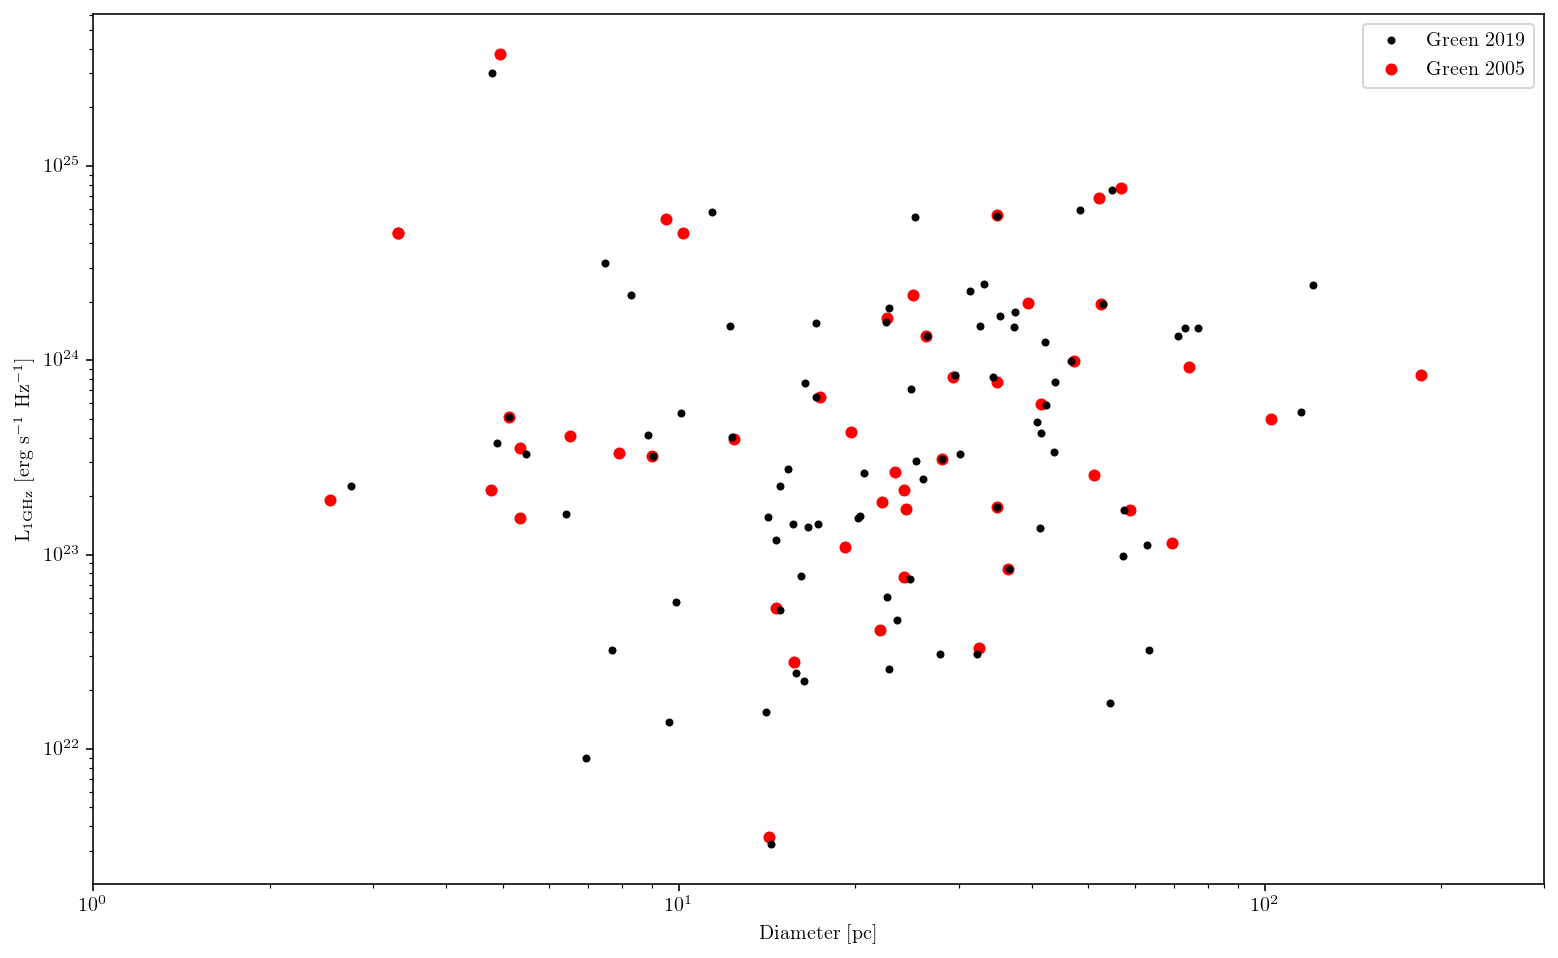

In [30]:
counter = 0

# lum plot and compare with Green 2005
plt.subplots()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Diameter [pc]')
plt.ylabel(r'L$_{1\mathrm{GHz}}$ [erg s$^{-1}$ Hz$^{-1}$]')
plt.xlim(1, 300)

for _, snr in snrs_dct.items():
        diam = snr.get_diameter()
        lum = snr.get_luminosity()
        plt.plot(diam, lum, 'k.')
        counter += 1
plt.plot(diam, lum, 'k.', label='Green 2019')

# compare with Green 2005
_J_over_erg_ = 1.e7
plt.plot(green2005_lum_diam_arr[:,0], green2005_lum_diam_arr[:,1]*_J_over_erg_, 'ro', markersize=5, zorder=0)
plt.plot(green2005_lum_diam_arr[1,0], green2005_lum_diam_arr[1,1]*_J_over_erg_, 'ro', markersize=5, zorder=0, label='Green 2005')

plt.legend(loc='best')

counter

#### $\Sigma_\nu$ vs diameter

84

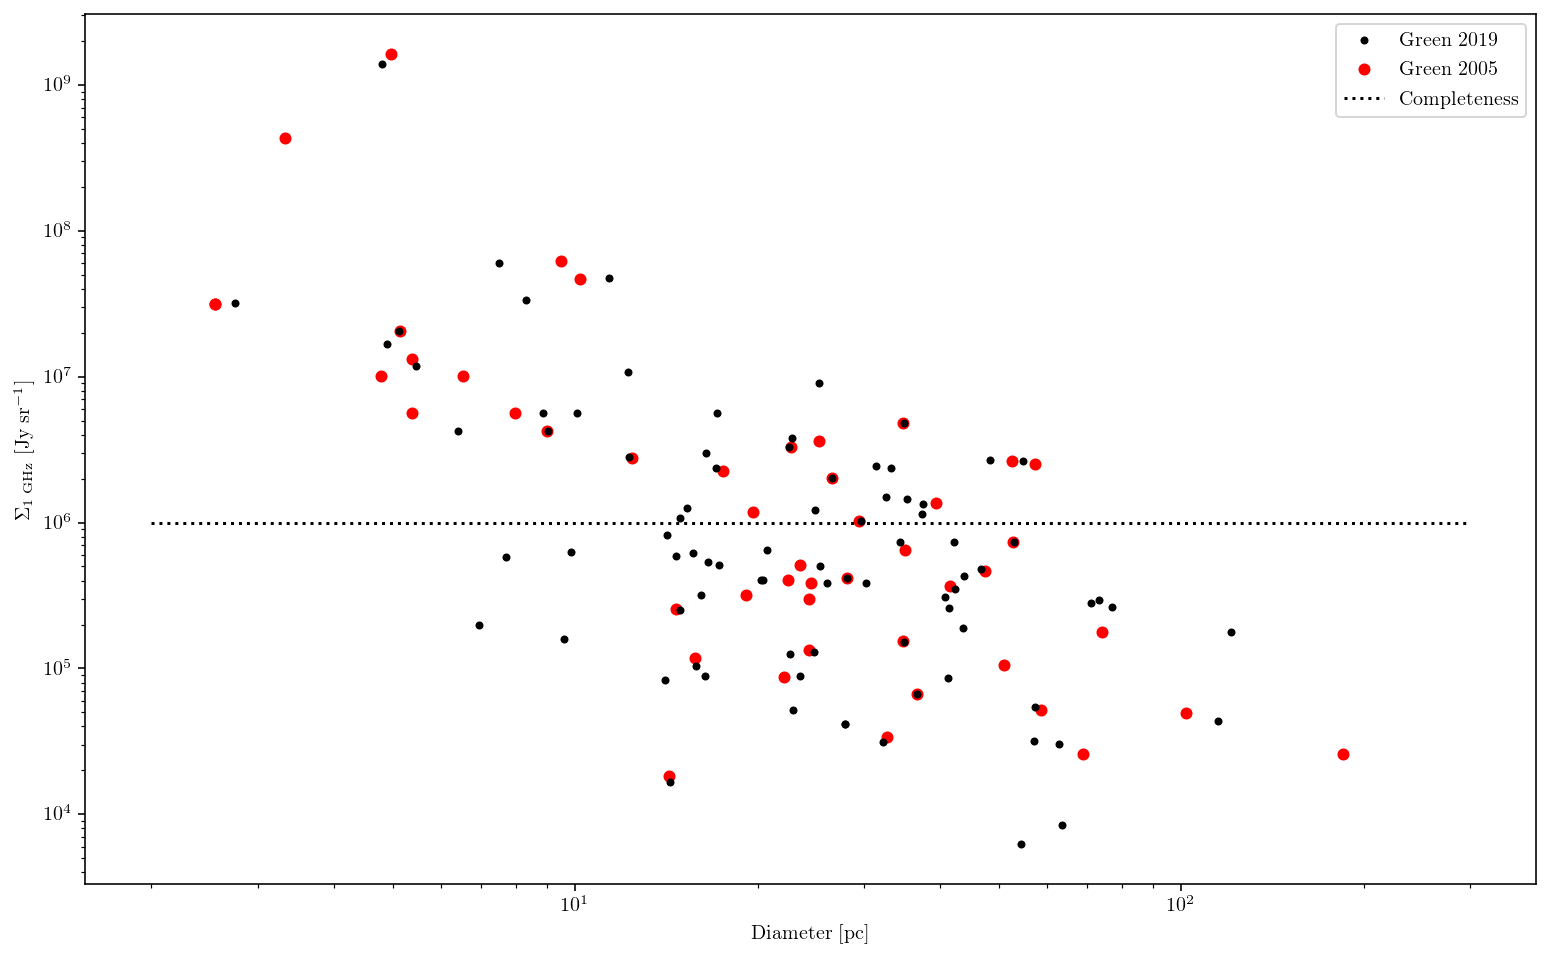

In [31]:
counter = 0

# Sigma plot
plt.subplots()
plt.yscale('log')
plt.xscale('log')
# plt.xlabel('Distance [kpc]')
plt.xlabel('Diameter [pc]')
plt.ylabel(r'$\Sigma_{1\;\mathrm{GHz}}$ [Jy sr$^{-1}$]')

for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:        
        diam = snr.get_diameter()
        Sigma = snr.get_SB()
        plt.plot(diam, Sigma, 'k.')
        counter += 1
        
plt.plot(green2005_SB_diam_arr[:,0], green2005_SB_diam_arr[:,1]/ct._Jy_over_SI_, 'ro', markersize=5, zorder=0)

# completeness cut
plt.hlines(1e-20 / ct._Jy_over_SI_, 2, 300, linestyles=":", label='Completeness')

# labels
plt.plot(diam, Sigma, 'k.', label='Green 2019')
plt.plot(green2005_SB_diam_arr[0,0], green2005_SB_diam_arr[0,1]/ct._Jy_over_SI_, 'ro', markersize=5, zorder=0, label='Green 2005')
plt.legend(loc='best')

counter

#### $S_\nu$ vs distance

84

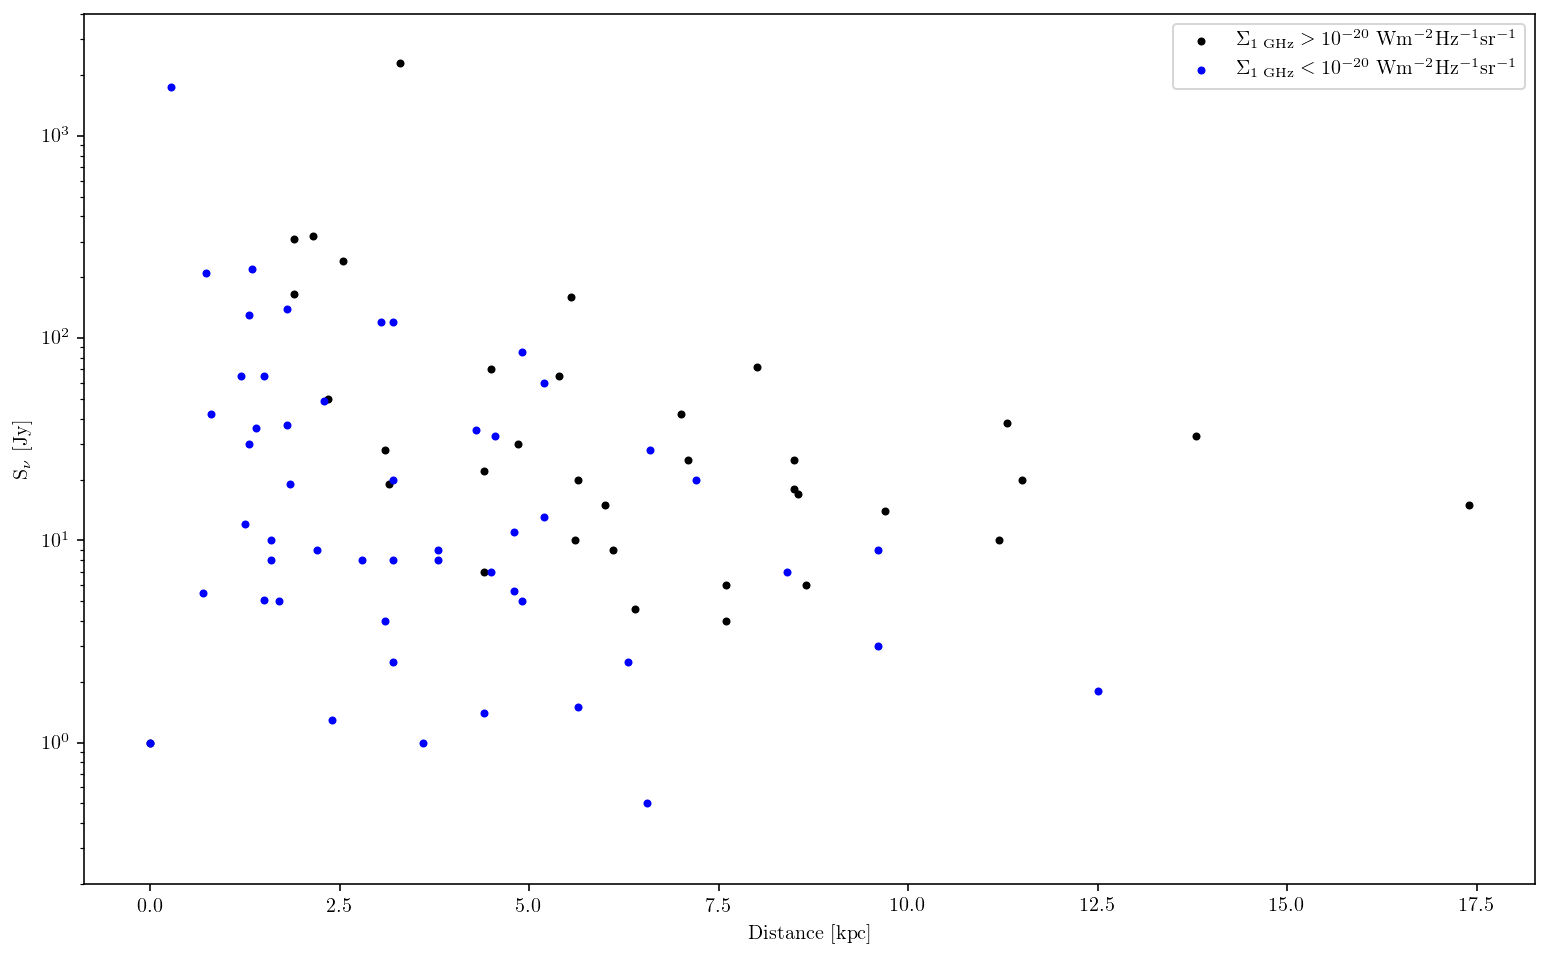

In [32]:
counter = 0

plt.subplots()
plt.yscale('log')
plt.xlabel('Distance [kpc]')
plt.ylabel(r'S$_\nu$ [Jy]')
plt.ylim(0.2, 4000)

for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:
        snr.get_SB()
        if snr.is_complete:        
            plt.plot(snr.distance, snr.snu_at_1GHz, 'k.')
        else:
            plt.plot(snr.distance, snr.snu_at_1GHz, 'b.')
        counter += 1
        
# labels
plt.plot([1,0.01], 'k.', label='$\Sigma_{1\;\mathrm{GHz}} > 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.plot([1,0.01], 'b.', label='$\Sigma_{1\;\mathrm{GHz}} < 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.legend(loc='best')
counter

#### $L_\nu$ vs distance

34

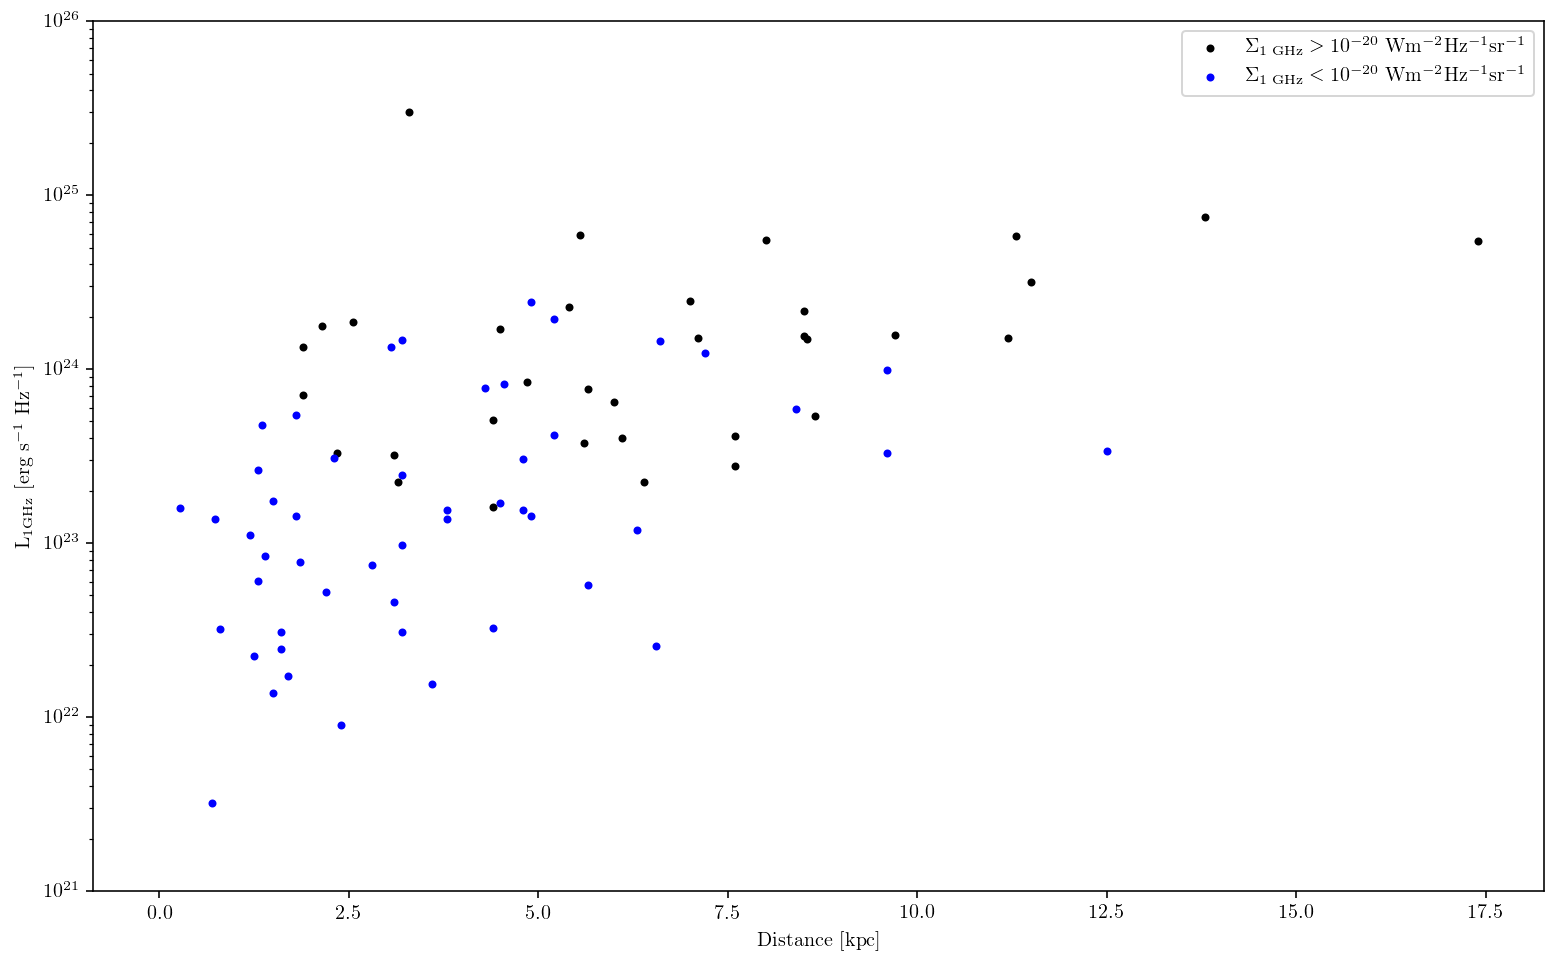

In [33]:
# lum plot
plt.subplots()
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Distance [kpc]')
plt.ylabel(r'L$_{1\mathrm{GHz}}$ [erg s$^{-1}$ Hz$^{-1}$]')
plt.ylim(1e21, 1e26)

counter = 0
for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:
        dist = snr.distance
        snu = snr.snu_at_1GHz
        lum = snr.get_luminosity()
        snr.get_SB()
        if snr.is_complete:
            plt.plot(snr.distance, lum, 'k.')
            counter += 1
        else:
            plt.plot(snr.distance, lum, 'b.')

# labels
plt.plot([1,0.01], 'k.', label='$\Sigma_{1\;\mathrm{GHz}} > 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.plot([1,0.01], 'b.', label='$\Sigma_{1\;\mathrm{GHz}} < 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.legend(loc='best')

counter

## 3. Histograms

In [34]:
# These are already loaded in dt. This is just to show you how to do it.

# # first let's parse snrs.list.html
# # names:
# path = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/snrs.list.html'
# snr_name_arr = dt.load_Green_catalogue_names(path=path)

# # catalogue:
# pathroot = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/'
# snrs_dct = dt.load_Green_catalogue(snr_name_arr, pathroot=pathroot, verbose=0)

In [35]:
for name, snr in dt.snrs_cut.items():
    print(name+" size:  \t%.1e" % snr.get_size())

G4.5+6.8 size:  	6.0e-07
G5.4-1.2 size:  	8.1e-05
G11.0-0.0 size:  	6.6e-06
G11.2-0.3 size:  	1.1e-06
G15.4+0.1 size:  	1.4e-05
G18.1-0.1 size:  	4.3e-06
G18.6-0.2 size:  	2.4e-06
G18.8+0.3 size:  	1.2e-05
G18.9-1.1 size:  	7.2e-05
G20.0-0.2 size:  	6.6e-06
G21.8-0.6 size:  	2.7e-05
G22.7-0.2 size:  	4.5e-05
G23.3-0.3 size:  	4.8e-05
G24.7-0.6 size:  	1.5e-05
G27.4+0.0 size:  	1.1e-06
G29.7-0.3 size:  	6.0e-07
G32.8-0.1 size:  	2.2e-05
G33.6+0.1 size:  	6.6e-06
G34.7-0.4 size:  	6.3e-05
G35.6-0.4 size:  	1.1e-05
G39.2-0.3 size:  	3.2e-06
G39.7-2.0 size:  	4.8e-04
G41.1-0.3 size:  	7.5e-07
G43.3-0.2 size:  	8.0e-07
G46.8-0.3 size:  	1.5e-05
G49.2-0.7 size:  	6.0e-05
G53.6-2.2 size:  	6.1e-05
G54.1+0.3 size:  	9.6e-06
G54.4-0.3 size:  	1.1e-04
G57.2+0.8 size:  	9.6e-06
G65.3+5.7 size:  	4.9e-03
G67.7+1.8 size:  	1.2e-05
G78.2+2.1 size:  	2.4e-04
G82.2+5.3 size:  	4.1e-04
G89.0+4.7 size:  	7.2e-04
G93.3+6.9 size:  	3.6e-05
G93.7-0.2 size:  	4.3e-04
G94.0+1.0 size:  	5.0e-05
G108.2-0.6 siz

In [36]:
for name, snr in dt.snrs_cut.items():
    print(name+" dist:  \t%.1e" % snr.get_distance())

G4.5+6.8 dist:  	3.1e+00
G5.4-1.2 dist:  	4.3e+00
G11.0-0.0 dist:  	2.4e+00
G11.2-0.3 dist:  	4.4e+00
G15.4+0.1 dist:  	4.8e+00
G18.1-0.1 dist:  	6.4e+00
G18.6-0.2 dist:  	4.4e+00
G18.8+0.3 dist:  	1.4e+01
G18.9-1.1 dist:  	1.8e+00
G20.0-0.2 dist:  	1.1e+01
G21.8-0.6 dist:  	5.4e+00
G22.7-0.2 dist:  	4.6e+00
G23.3-0.3 dist:  	4.5e+00
G24.7-0.6 dist:  	3.8e+00
G27.4+0.0 dist:  	8.7e+00
G29.7-0.3 dist:  	5.6e+00
G32.8-0.1 dist:  	4.8e+00
G33.6+0.1 dist:  	5.7e+00
G34.7-0.4 dist:  	2.5e+00
G35.6-0.4 dist:  	3.8e+00
G39.2-0.3 dist:  	8.5e+00
G39.7-2.0 dist:  	4.9e+00
G41.1-0.3 dist:  	8.5e+00
G43.3-0.2 dist:  	1.1e+01
G46.8-0.3 dist:  	8.6e+00
G49.2-0.7 dist:  	5.6e+00
G53.6-2.2 dist:  	2.8e+00
G54.1+0.3 dist:  	6.5e+00
G54.4-0.3 dist:  	6.6e+00
G57.2+0.8 dist:  	1.2e+01
G65.3+5.7 dist:  	8.0e-01
G67.7+1.8 dist:  	3.6e+00
G78.2+2.1 dist:  	2.1e+00
G82.2+5.3 dist:  	3.2e+00
G89.0+4.7 dist:  	1.4e+00
G93.3+6.9 dist:  	2.2e+00
G93.7-0.2 dist:  	1.5e+00
G94.0+1.0 dist:  	5.2e+00
G108.2-0.6 dis

In [37]:
alphas = []
sizes = []
dists = []
radii = []
for name, snr in dt.snrs_cut.items():
    
    alpha = snr.alpha
    alphas.append(alpha)
    
    sz = snr.get_size()
    sizes.append(sz)
    
    d = snr.get_distance()
    dists.append(d)
    
    r = snr.get_radius()
    radii.append(r)
    
alphas = np.array(alphas)
sizes = np.array(sizes)
dists = np.array(dists)
radii = np.array(radii)

No handles with labels found to put in legend.


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_alpha_dist.pdf


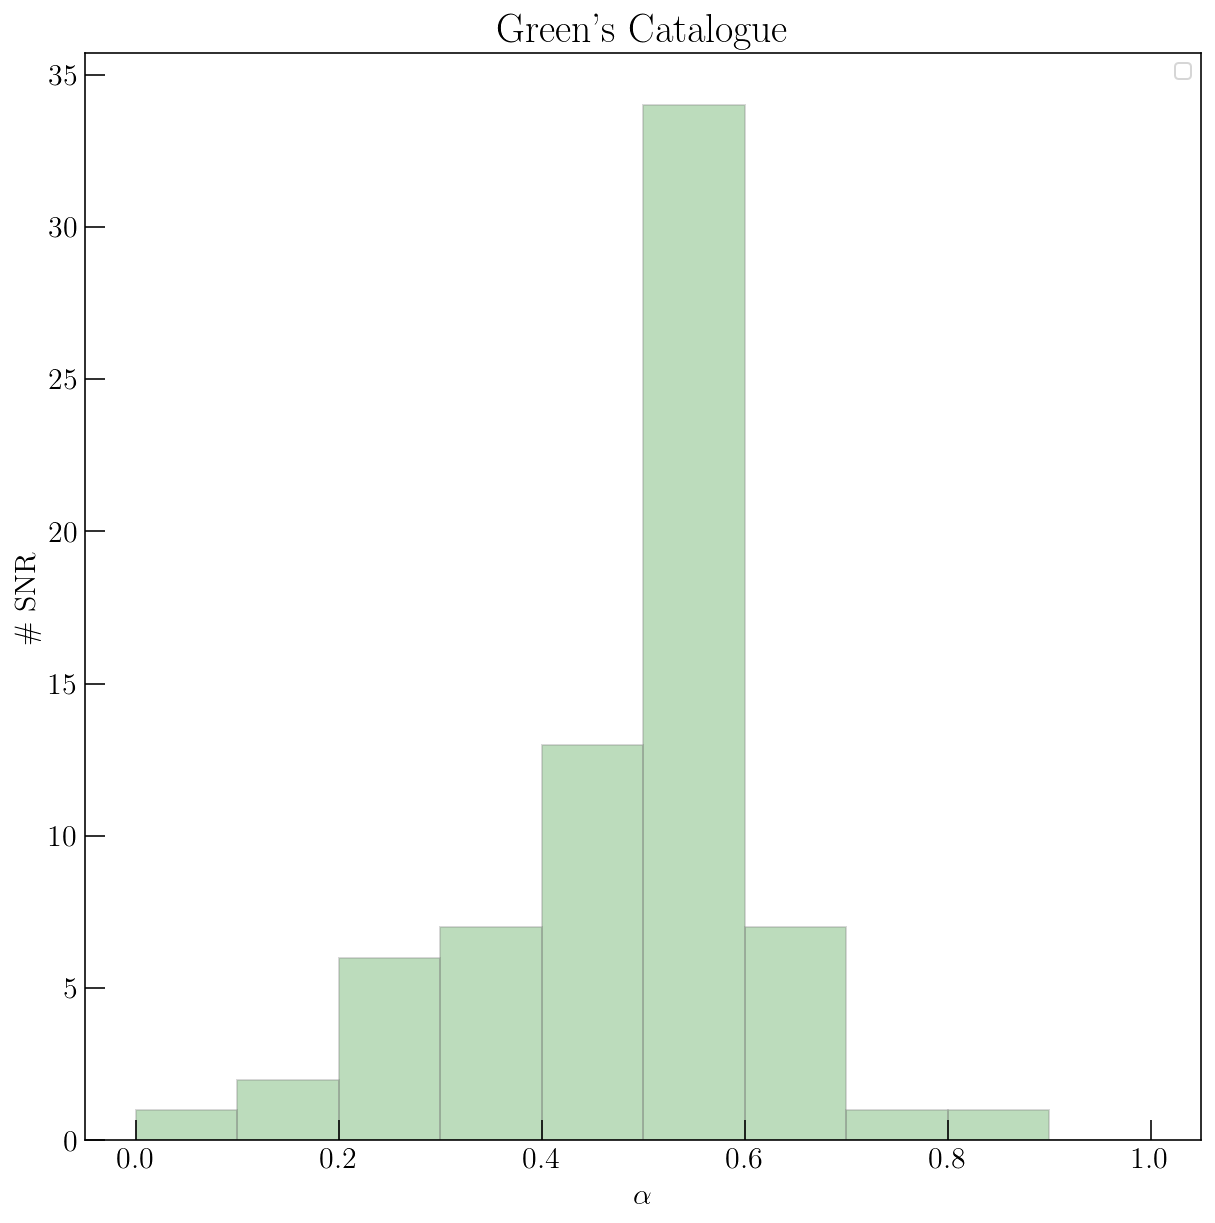

In [38]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 1., 11);
plt.hist(alphas,
         bins=bins,
         alpha=0.3,
         color='forestgreen',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\alpha$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_alpha_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

No handles with labels found to put in legend.


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_nu-fac_dist.pdf


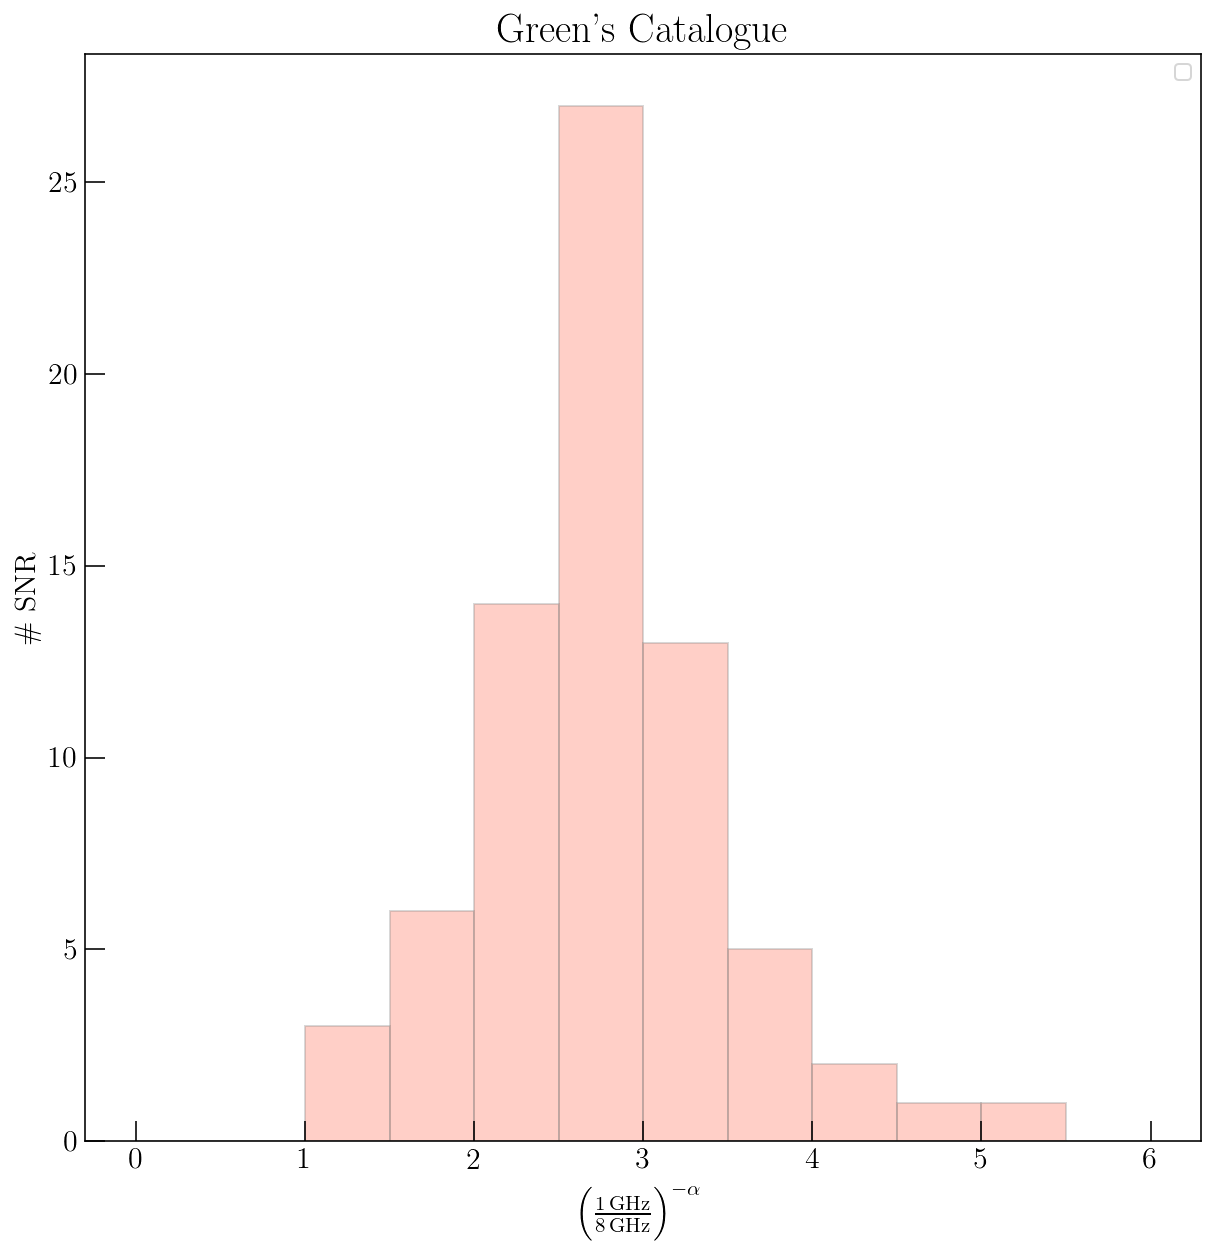

In [39]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 6., 13);

nu_facs = ap.nu_factor(1., 8., alphas)

plt.hist(nu_facs,
         bins=bins,
         alpha=0.3,
         color='tomato',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\bigg( \frac{1\,\mathrm{GHz}}{8\,\mathrm{GHz}} \bigg)^{-\alpha}$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_nu-fac_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

In [36]:
# computing the mean, std, min, and max of the SNR distances

dists = np.array([snr.distance for name, snr in dt.snrs_dct.items() if not snr.no_dist])

print("No. of distances: {}".format(len(dists)))
print("mean:\t{} kpc\nstd:\t{} kpc\nmin:\t{} kpc\nmax:\t{} kpc".format(dists.mean(), dists.std(), dists.min(), dists.max()))

No. of distances: 90
mean:	4.74627777778 kpc
std:	3.26770727993 kpc
min:	0.275 kpc
max:	17.4 kpc


In [40]:
# computing the mean, std, min, and max of the SNR distances with certain flux

dists = np.array([snr.distance for name, snr in dt.snrs_cut.items()])

print("No. of distances: {}".format(len(dists)))
print("mean:\t{} kpc\nstd:\t{} kpc\nmin:\t{} kpc\nmax:\t{} kpc".format(dists.mean(), dists.std(), dists.min(), dists.max()))

No. of distances: 72
mean:	5.121527777777778 kpc
std:	3.3523709104827017 kpc
min:	0.7 kpc
max:	17.4 kpc


No handles with labels found to put in legend.


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_D_dist.pdf


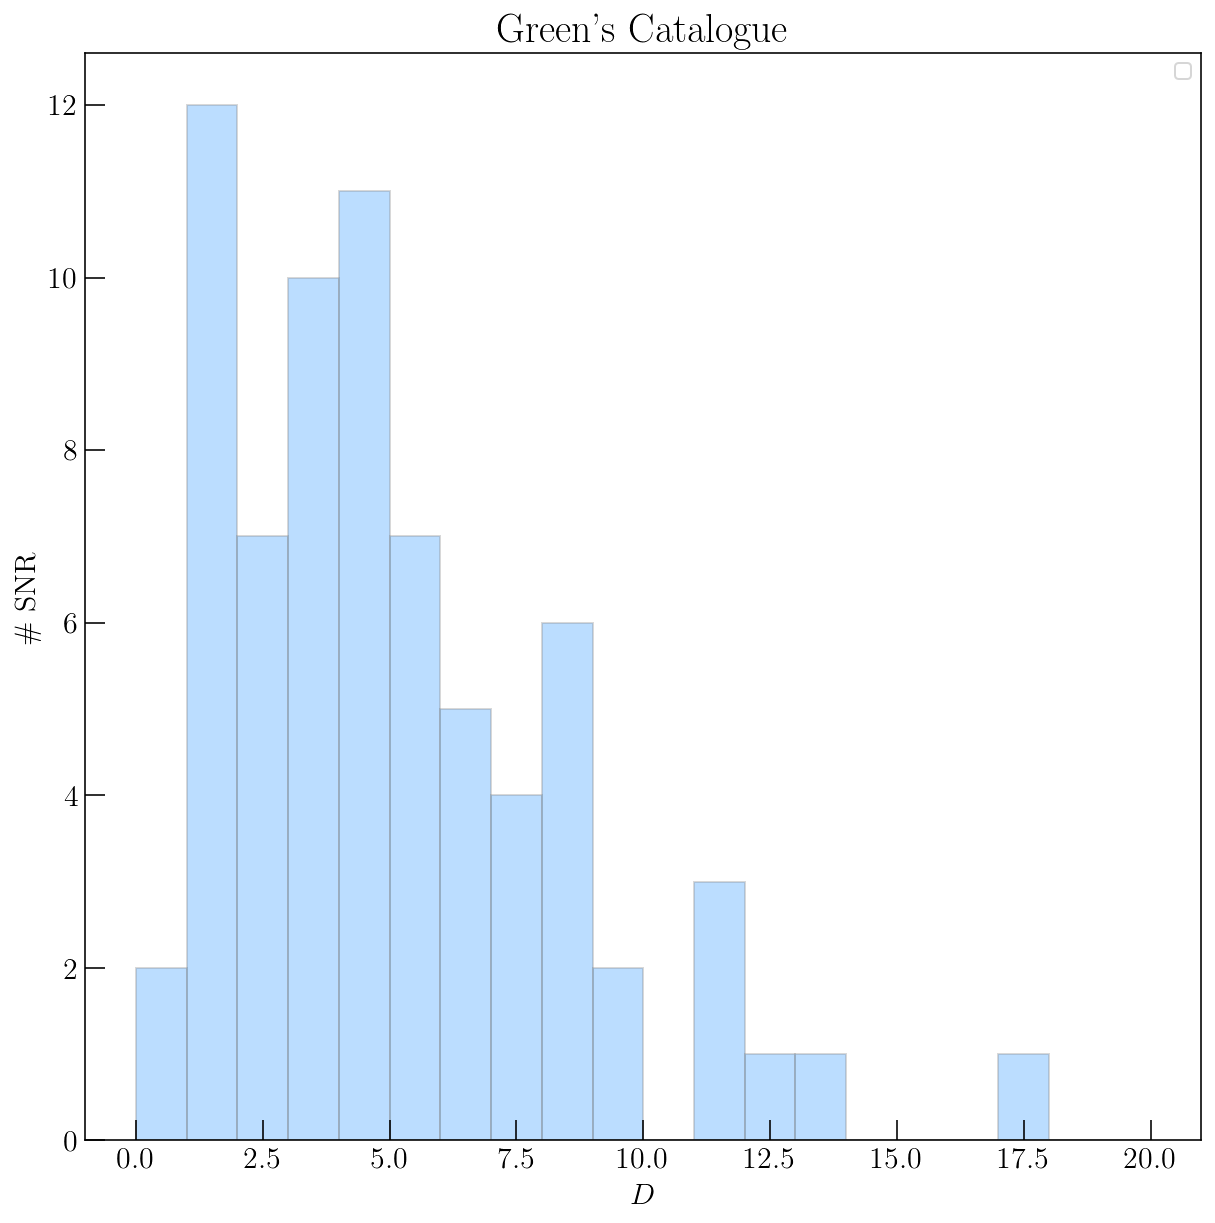

In [41]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 20., 21);
plt.hist(dists,
         bins=bins,
         alpha=0.3,
         color='dodgerblue',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$D$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_D_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

No handles with labels found to put in legend.


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_size_dist.pdf


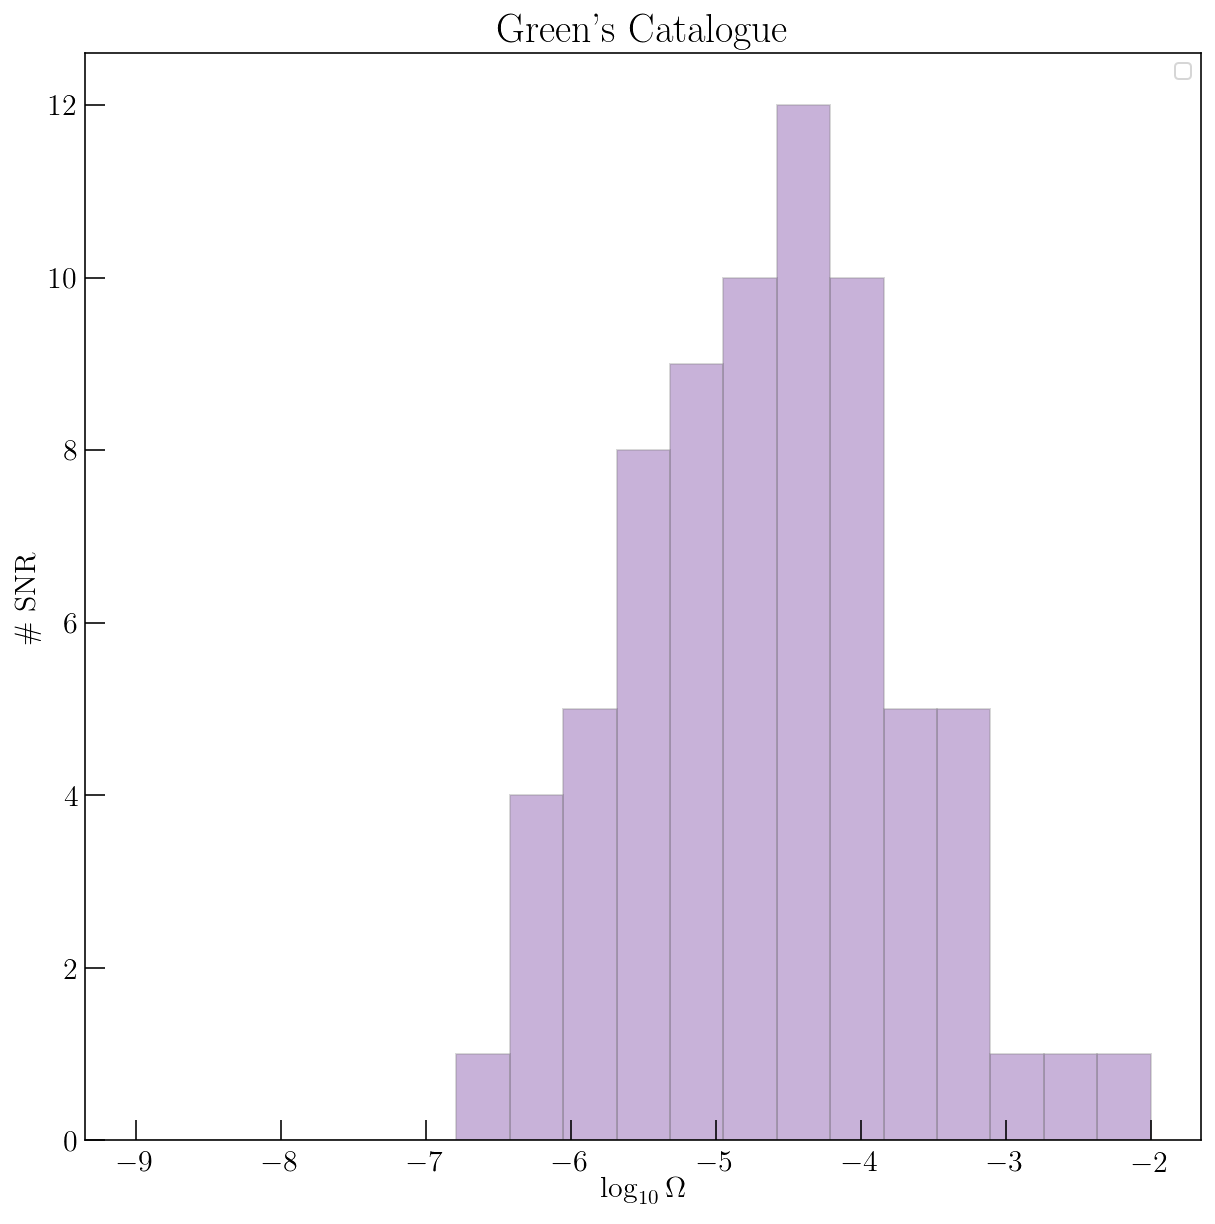

In [42]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(-9, -2, 20);
plt.hist(log10(sizes),
         bins=bins,
         alpha=0.3,
         color='indigo',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\log_{10} \Omega$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_size_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

No handles with labels found to put in legend.


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_radii_dist.pdf


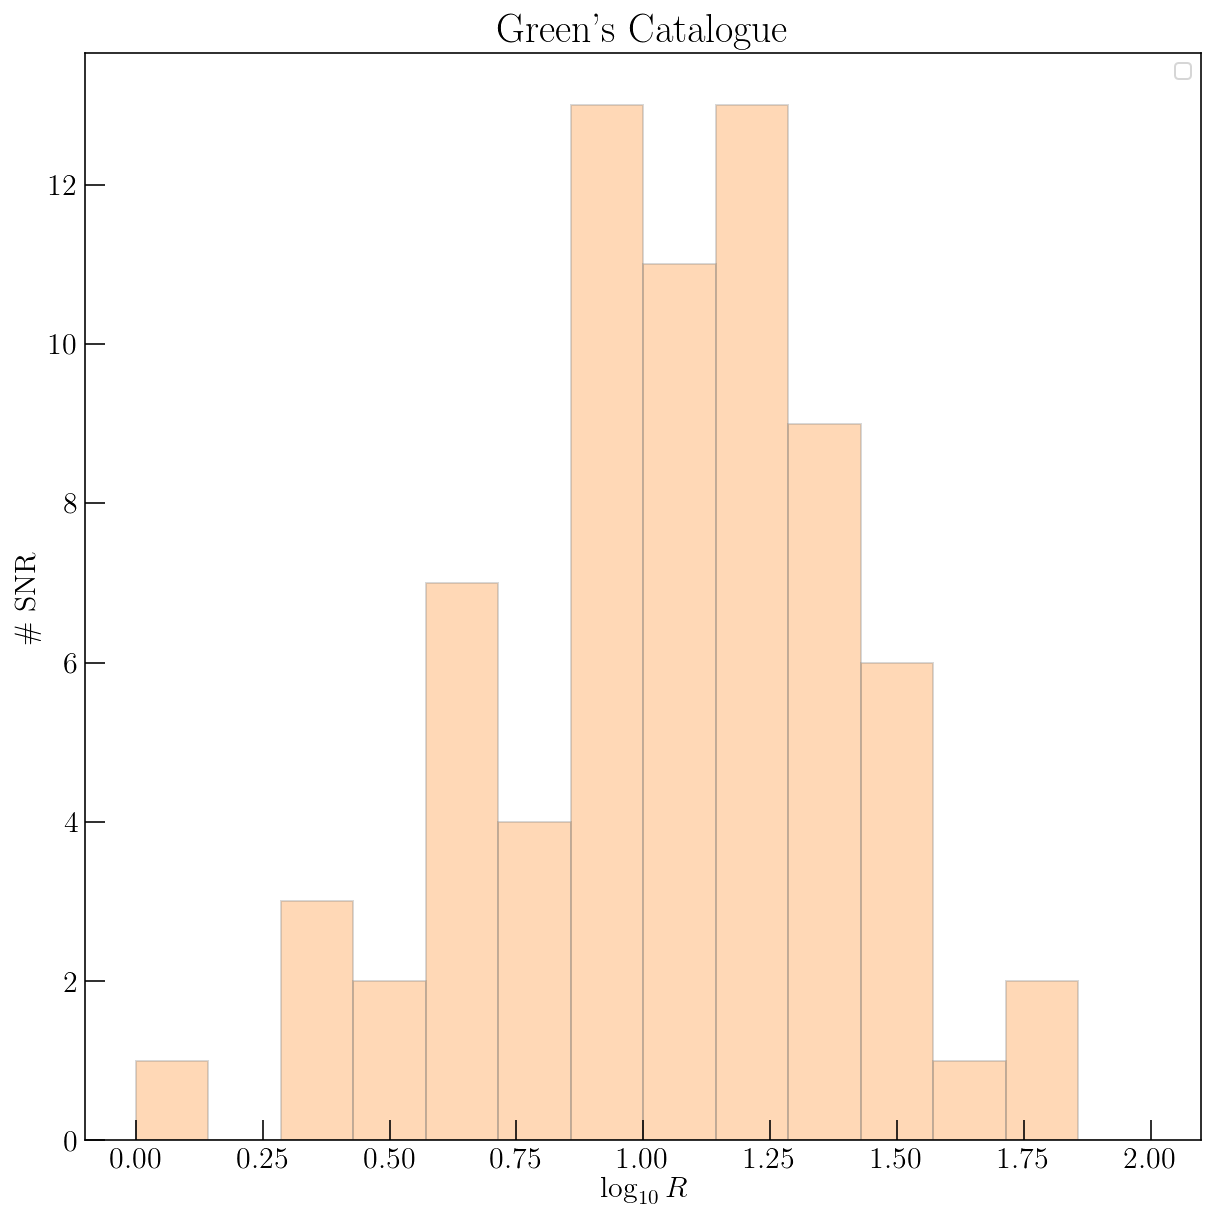

In [43]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0, 2, 15);
plt.hist(log10(radii),
         bins=bins,
         alpha=0.3,
         color='C1',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\log_{10} R$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_radii_dist.pdf"
print(file_name)

## 4. Time estimation

In [44]:
# Cassiopeia A
dt.snrs_cut[CasA].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': True,
 'is_flux_certain': True,
 'is_type_certain': True,
 'name': 'G111.7-2.1',
 'l': 111.7,
 'b': -2.1,
 'age': 321.0,
 'ang_size': 5.0,
 'sr': 1.6614302187698022e-06,
 'type': 'S',
 'snu_at_1GHz': 2300.0,
 'alpha': 0.77,
 'distance': 3.3,
 'radius': 2.3998277214922035}

In [46]:
# W50
dt.snrs_cut[W50].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': False,
 'is_flux_certain': False,
 'is_type_certain': False,
 'name': 'G39.7-2.0',
 'l': 39.7,
 'b': -2.0,
 'ang_size': 84.8528137423857,
 'sr': 0.0004784858509023251,
 'snu_at_1GHz': 85.0,
 'alpha': 0.7,
 'distance': 4.9,
 'age': 54772.25575051661,
 'radius': 60.47257332493333}

In [47]:
# W28
dt.snrs_dct[W28].__dict__

{'no_dist': False,
 'no_flux': False,
 'is_complete': False,
 'is_spectral_certain': False,
 'is_flux_certain': True,
 'is_type_certain': True,
 'name': 'G6.4-0.1',
 'l': 6.4,
 'b': -0.1,
 'ang_size': 48.0,
 'sr': 0.00015311679381005744,
 'type': 'C',
 'snu_at_1GHz': 310.0,
 'distance': 1.9,
 'age': 34467.37587922817,
 'radius': 13.264502315156903}

### 4.1 Age model

In [48]:
help(dt.age_from_radius)

Help on function age_from_radius in module data:

age_from_radius(R, method=None, **kwargs)
    Computes the age [years] of a SNR based on its radius [pc].



In [49]:
help(dt.pheno_age)

Help on function pheno_age in module astro:

pheno_age(R, Rst=3.8, tst=360.0, eta1=1.0, eta2=0.4)
    SNR age [years] as deduced from a phenomenological broken power-law function of the SNR blast radius [pc]. The default values are taken from Tables 2 & 3 of the Truelove-McKee '99 paper for n=0 ejecta, with M_ej = 1 M_sun, E_sn = 1.e51 erg, and n0 = 0.2 cm^-3.
    
    Parameters
    ----------
    R : SNR radius [pc]
    Rst : radius [pc] at the start of the Sedov-Taylor (adiabatic) expansion phase (default: 3.8)
    tst : age [years] at the start of the Sedov-Taylor (adiabatic) expansion phase (default 360.)
    eta1 : the power scaling R~t^eta1 during the Ejecta-Dominated phase (default: 1.)
    eta2 : the power scaling R`t^eta2 during the Sedov-Taylor expansion phase (default: 2/5 = 0.4)



In [50]:
help(dt.physics_age)

Help on function physics_age in module astro:

physics_age(R, model='estimate', M_ej=1.0, E_sn=1.0, rho0=1.0)
    SNR age [years] as deduced from a physically-motivated a function of the SNR blast radius [pc]. Using either a simple model, or formulas by Truelove & McKee 1999 (TM99).
    
    Parameters
    ----------
    R : SNR radius today [pc]
    model : 'estimate'/'TM99-simple'/TM99-0'': whether the simple one-phase 'estimate' model is used, or instead the two-phase Truelove-McKee model (ED-ST, or Ejecta-Dominated -- Sedov-Taylor), either in a simplified form, or for n=0 (uniform) ejecta profile.
    M_ej : Mass of the ejecta [M_sun] (default: 1.)
    E_sn : Energy of the SNR [1.e51 ergs] (default: 1.)
    rho0 : Mass density of surrounding medium [m_proton/cm^3] (default: 1.)



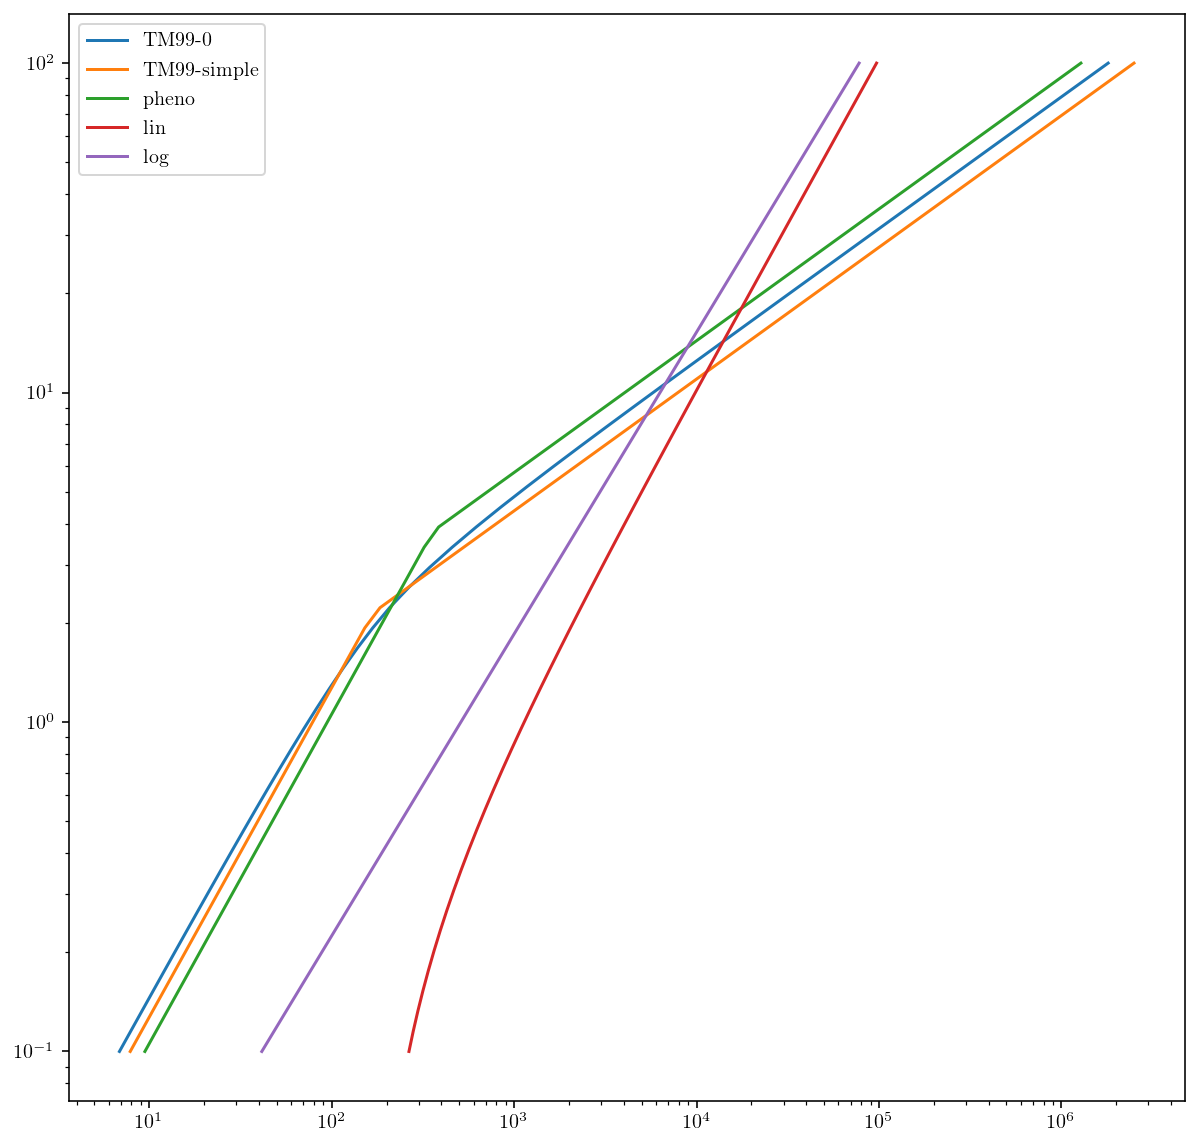

In [51]:
R_arr = np.logspace(-1, 2)

tarr = np.array([dt.age_from_radius(R, method='TM99-0') for R in R_arr])
tarr2 = np.array([dt.age_from_radius(R, method='TM99-simple') for R in R_arr])
tarr3 = np.array([dt.age_from_radius(R, method="pheno") for R in R_arr])
tarr4 = np.array([dt.age_from_radius(R, method="lin") for R in R_arr])
tarr5 = np.array([dt.age_from_radius(R, method="log") for R in R_arr])

plt.loglog(tarr, R_arr, label="TM99-0")
plt.loglog(tarr2, R_arr, label="TM99-simple")
plt.loglog(tarr3, R_arr, label="pheno")
plt.loglog(tarr4, R_arr, label="lin")
plt.loglog(tarr5, R_arr, label="log")

plt.legend();

### 4.2 Results

In [80]:
(dt.age_from_radius(RCasA, method='lin', rho0=3.2, M_ej=3.))

array(7583.56648608)

In [87]:
snr = dt.snrs_cut[CasA]

RCasA = snr.get_radius()
print('CasA: R={} pc, age={} years'.format(RCasA, snr.age))

# rho0 and M_ej values from TM99 Table 1
print('estimate %s' % (dt.age_from_radius(RCasA, method='estimate', rho0=3.2, M_ej=3.)))
print('TM99-simple %s' % (dt.age_from_radius(RCasA, method='TM99-simple', rho0=3.2, M_ej=3.)))
print('TM99-0 %s' % (dt.age_from_radius(RCasA, method='TM99-0', rho0=3.2, M_ej=3.)))
print('pheno %s' % (dt.age_from_radius(RCasA, method="pheno")))
print('lin %s' % (dt.age_from_radius(RCasA, method='lin', rho0=3.2, M_ej=3.)))
print('log %s' % (dt.age_from_radius(RCasA, method='log', rho0=3.2, M_ej=3.)))

del snr

CasA: R=2.3998277214922035 pc, age=321.0 years
estimate 1001.2986332109173
TM99-simple 398.87284747294626
TM99-0 414.8788657309189
pheno 227.3520999308403
lin 2492.1461832847817
log 1328.9597277490668


In [88]:
M_ej_bench = 1.
rho0_bench = 1.
E_sn_bench = 1.

for name, snr in dt.snrs_age_only.items():
    try:
        snr.get_distance()
    except:
        continue
    
    Rsnr = snr.get_radius()
    print('SNR {}:\n\tR={} pc, age={} years\n'.format(name, Rsnr, snr.age))
    print('\testimate', dt.age_from_radius(Rsnr, method='estimate', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench))
    print('\tTM99-simple %s' % dt.age_from_radius(Rsnr, method='TM99-simple', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench))
    print('\tTM99-0 %s' % dt.age_from_radius(Rsnr, method='TM99-0', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench))
    print('\tpheno %s' % dt.age_from_radius(Rsnr, method="pheno"))
    print('\tlin %s' % dt.age_from_radius(Rsnr, method="lin"))
    print('\tlog %s' % dt.age_from_radius(Rsnr, method="log"))
    print('\n')

SNR G4.5+6.8:
	R=1.3744467859455345 pc, age=417.0 years

	estimate 138.94991803407217
	TM99-simple 108.21609873521848
	TM99-0 107.61600953491259
	pheno 130.21074814220853
	lin 1499.3329105961338
	log 723.3567457945701


SNR G6.4-0.1:
	R=13.264502315156903 pc, age=34467.37587922817 years

	estimate 40203.68572998436
	TM99-simple 16015.360526961193
	TM99-0 11635.015250150827
	pheno 8195.414218878246
	lin 13011.742136453853
	log 8586.92860525543


SNR G11.2-0.3:
	R=2.55981623625835 pc, age=1635.0 years

	estimate 657.7493736374353
	TM99-simple 262.0181001795563
	TM99-0 264.47327769166566
	pheno 242.5089065928963
	lin 2647.0532187397475
	log 1425.937427741681


SNR G15.4+0.1:
	R=10.116889494717933 pc, age=4527.6925690687085 years

	estimate 20424.71407206542
	TM99-simple 8136.297794216014
	TM99-0 5948.171149498197
	pheno 4163.523544755174
	lin 9964.102301263521
	log 6389.240264560449


SNR G18.1-0.1:
	R=7.446738141842473 pc, age=6774.953874381729 years

	estimate 9494.097252585932
	TM99-si

## 5. radio background (Haslam map)

In [3]:
import healpy as hp
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.coordinates import Galactic
from astropy import units as u

### 5.1 map with point source filterred out

In [4]:
#path = "/a/home/cc/students/physics/chensun/Code/alaser/data/lambda_haslam408_nofilt.fits"
path = "../data/lambda_haslam408_dsds.fits"
f = fits.open(path)
f.info()

Filename: ../data/lambda_haslam408_dsds.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  Archive Map Table    1 BinTableHDU     33   3145728R x 2C   [E, E]   


In [5]:
tmp = f['PRIMARY']
tmp.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2003-02-05T00:00:00' /file creation date (YYYY-MM-DDThh:mm:ss UT)    
OBJECT  = 'ALL-SKY '           / Portion of sky given                           
COMMENT   This file contains data from the Haslam 408 MHz radio continuum       
COMMENT   sky survey.  The survey data were obtained from the archives of the   
COMMENT   NCSA ADIL in equatorial 1950 coordinates, and subsequently processed  
COMMENT   further in the Fourier domain to mitigate baseline striping and strong
COMMENT   point sources.  Th

In [6]:
tmp = f['Archive Map Table']
tmp.header

XTENSION= 'BINTABLE'           /binary table extension                          
BITPIX  =                    8 /8-bit bytes                                     
NAXIS   =                    2 /2-dimensional binary table                      
NAXIS1  =                    8 /width of table in bytes                         
NAXIS2  =              3145728 /number of rows in table                         
PCOUNT  =                    0 /size of special data area                       
GCOUNT  =                    1 /one data group (required keyword)               
TFIELDS =                    2 /number of fields in each row                    
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [7]:
tmp.columns

ColDefs(
    name = 'TEMPERATURE'; format = 'E'; unit = 'K'
    name = 'N_OBS'; format = 'E'; unit = 'counts'
)

In [8]:
# read the map
map_allsky_408 = hp.read_map(path) 

<IPython.core.display.Javascript object>


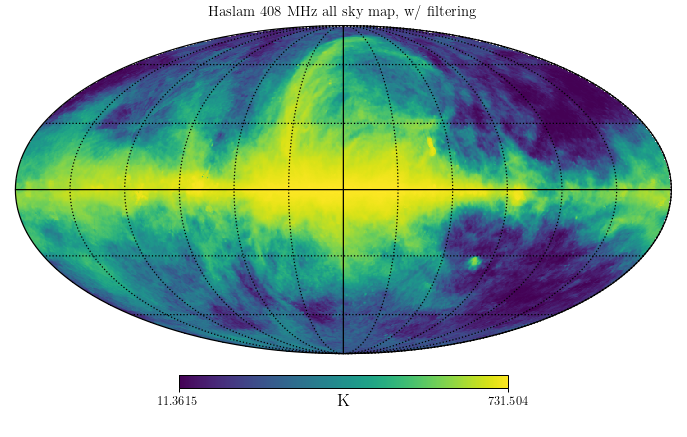

0.0 180.0 -180.0 180.0


In [9]:
hp.mollview(
    map_allsky_408,
    #max=5000,       
    #coord= "GC", 
    title="Haslam 408 MHz all sky map,  w/ filtering",      
    unit="K",
    norm="hist",
#     min=-1,
#     max=1,
)
hp.graticule()

<IPython.core.display.Javascript object>


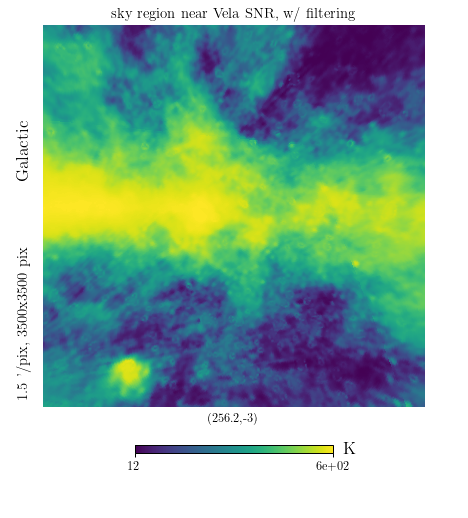

In [10]:
# check with Ghosh et al. Fig. 2
hp.gnomview(map_allsky_408, 
            rot=[256.2, -3], 
            coord=['G'], 
            norm='hist',
            max=600,            
            xsize=3500, 
            #ysize=1000,
            #remove_dip=True,
            #remove_mono=True,
            #min=10.,
            #max=250.,
            #title="Comparison with Ghosh et al. Fig.2", 
            title="sky region near Vela SNR,  w/ filtering",            
            unit="K", 
            format="%.2g")

### 5.1 map with point source

In [11]:
#path = "/a/home/cc/students/physics/chensun/Code/alaser/data/lambda_haslam408_nofilt.fits"
path = "../data/lambda_haslam408_nofilt.fits"
f = fits.open(path)
f.info()

Filename: ../data/lambda_haslam408_nofilt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  Archive Map Table    1 BinTableHDU     24   3145728R x 2C   [1E, 1E]   


In [12]:
tmp = f['PRIMARY']
tmp.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2012-04-03T00:00:00' /file creation date (YYYY-MM-DDThh:mm:ss UT)    
OBJECT  = 'ALL-SKY '           / Portion of sky given                           
COMMENT   This file contains data from the Haslam 408 MHz radio continuum       
COMMENT   sky survey.  The survey data were downloaded from the Max Planck      
COMMENT   Institute for Radioastronomy Survey Sampler website and interpolated  
COMMENT   to HEALPix projection with Nside=512. No filtering or other processing
COMMENT   was applied. The d

In [13]:
tmp = f['Archive Map Table']
tmp.header

XTENSION= 'BINTABLE'           /binary table extension                          
BITPIX  =                    8 /8-bit bytes                                     
NAXIS   =                    2 /2-dimensional binary table                      
NAXIS1  =                    8 /width of table in bytes                         
NAXIS2  =              3145728 /number of rows in table                         
PCOUNT  =                    0 /size of special data area                       
GCOUNT  =                    1 /one data group (required keyword)               
TFIELDS =                    2 /number of fields in each row                    
TTYPE1  = 'TEMPERATURE'        /label for field   1                             
TFORM1  = '1E      '           /data format of field: 4-byte REAL               
TUNIT1  = 'mK       '          /physical unit of field                          
TTYPE2  = 'N_OBS   '           /label for field   2                             
TFORM2  = '1E      '        

In [14]:
tmp.columns

ColDefs(
    name = 'TEMPERATURE'; format = '1E'; unit = 'mK'
    name = 'N_OBS'; format = '1E'; unit = 'counts'
)

In [15]:
# read the map
map_allsky_408_nofilt = hp.read_map(path) 

<IPython.core.display.Javascript object>


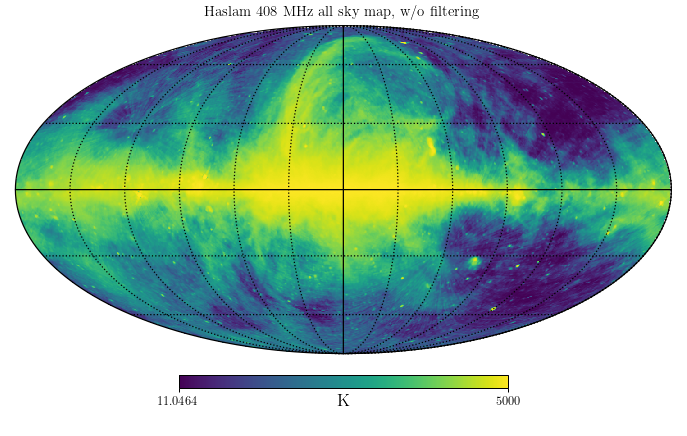

0.0 180.0 -180.0 180.0


In [16]:
hp.mollview(
    map_allsky_408_nofilt/1000, # because this unfilterred map is in the unit of mK
    max=5000,    
    #coord= "GC", 
    title="Haslam 408 MHz all sky map, w/o filtering",
    unit="K",
    norm="hist",
#     min=-1,
#     max=1,
)
hp.graticule()

<IPython.core.display.Javascript object>


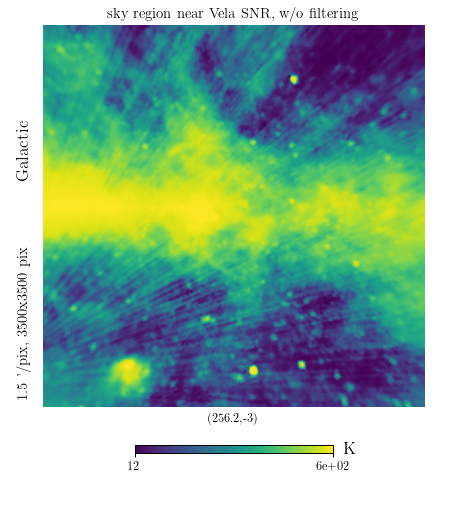

In [17]:
# check with Ghosh et al. Fig. 2
hp.gnomview(map_allsky_408_nofilt/1000, 
            rot=[256.2, -3], 
            coord=['G'], 
            xsize=3500, 
            norm='hist',
            max=600,
            #ysize=1000,
            #remove_dip=True,
            #remove_mono=True,
            #min=10.,
            #max=250.,
            #title="Comparison with Ghosh et al. Fig.2", 
            title="sky region near Vela SNR,  w/o filtering",
            unit="K", 
            format="%.2g")

In [95]:
# test module